In [2]:
import pandas as pd
import numpy as np

In [3]:
import nolds
#from python_git_wrapper import Repository
import numpy as np
import pandas as pd
from random import gauss, seed
from pyrqa.time_series import TimeSeries
from pyrqa.settings import Settings
from pyrqa.analysis_type import Classic
from pyrqa.neighbourhood import FixedRadius
from pyrqa.metric import EuclideanMetric
from pyrqa.computation import RQAComputation
import quandl
from scipy import signal
from scipy import integrate

import matplotlib.pyplot as plt

In [4]:
import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI
#from tigramite.independence_tests import GPDC, CMIknn, CMIsymbParCorr
from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb
from tigramite.models import LinearMediation, Prediction

C:\Users\subar\anaconda3\envs\d\lib\site-packages\tigramite\data_processing.py:1337: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _get_patterns(array, array_mask, patt, patt_mask, weights, dim, step, fac, N, T):
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [54]:
data = pd.read_csv("D://KaggleData//enefit//train.csv")


In [55]:
data = data.sort_values(by=['product_type','county'])
print(data.head(20))

      county  is_business  ...  row_id  prediction_unit_id
6          0            1  ...       6                   3
7          0            1  ...       7                   3
128        0            1  ...     128                   3
129        0            1  ...     129                   3
250        0            1  ...     250                   3
251        0            1  ...     251                   3
372        0            1  ...     372                   3
373        0            1  ...     373                   3
494        0            1  ...     494                   3
495        0            1  ...     495                   3
616        0            1  ...     616                   3
617        0            1  ...     617                   3
738        0            1  ...     738                   3
739        0            1  ...     739                   3
860        0            1  ...     860                   3
861        0            1  ...     861                  

In [19]:
y = data['target']
y = pd.DataFrame(y)
yy = y.head(1900)

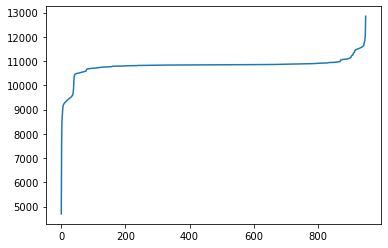

In [20]:
dd = np.ravel(yy)#data_to_predict)
p,f = signal.periodogram(dd)
#print(p)
#print(f)
a = integrate.cumtrapz(f,np.sqrt(p),0)
plt.plot(a)

In [ ]:
#we can rule out random and chaotic logistic

#appears to be a cross between lorenz and 4 cycle logistic 



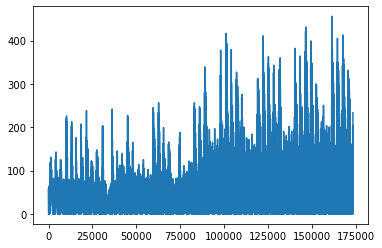

In [35]:
plt.plot(yy)

In [39]:
from hurst import compute_Hc, random_walk

H, c, data = compute_Hc(yy, kind='change', simplified=True)
print(H)

0.9609516456102696


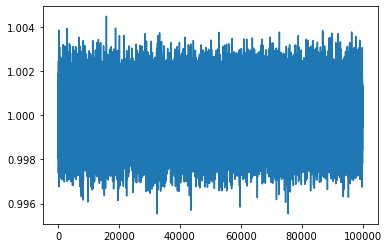

In [42]:
np.random.seed(42)
random_changes = 1. + np.random.randn(99999) / 1000.
series = np.cumprod(random_changes)  # create a random walk from random changes

plt.plot(random_changes)

In [24]:
time_series = TimeSeries(dd,
                         embedding_dimension=2,
                         time_delay=2)
settings = Settings(time_series,
                    analysis_type=Classic,
                    neighbourhood=FixedRadius(0.65),
                    similarity_measure=EuclideanMetric,
                    theiler_corrector=1)
computation = RQAComputation.create(settings,
                                    verbose=True)
result = computation.run()
result.min_diagonal_line_length = 2
result.min_vertical_line_length = 2
result.min_white_vertical_line_length = 2
print(result)

#model = TsFeatures()
f_series = pd.DataFrame(yy,columns=(['target']))#np.array(f_series)
print(f_series)

[Platform 'Intel(R) OpenCL']
Vendor: Intel(R) Corporation
Version: OpenCL 3.0 WINDOWS
Profile: FULL_PROFILE
Extensions: cl_khr_spirv_linkonce_odr cl_khr_fp64 cl_khr_icd cl_khr_global_int32_base_atomics cl_khr_global_int32_extended_atomics cl_khr_local_int32_base_atomics cl_khr_local_int32_extended_atomics cl_khr_int64_base_atomics cl_khr_int64_extended_atomics cl_khr_byte_addressable_store cl_khr_depth_images cl_khr_3d_image_writes cl_khr_il_program cl_intel_unified_shared_memory_preview cl_intel_device_attribute_query cl_intel_subgroups cl_intel_subgroups_char cl_intel_subgroups_short cl_intel_subgroups_long cl_intel_spirv_subgroups cl_intel_required_subgroup_size cl_intel_exec_by_local_thread cl_intel_vec_len_hint cl_khr_spir cl_khr_image2d_from_buffer 


[Device '12th Gen Intel(R) Core(TM) i7-12700H']
Vendor: Intel(R) Corporation
Type: 2
Version: OpenCL 3.0 (Build 0)
Profile: FULL_PROFILE
Max Clock Frequency: 0
Global Mem Size: 68368355328
Address Bits: 64
Max Compute Units: 20
Max 

C:\Users\subar\anaconda3\envs\d\lib\site-packages\pyopencl\__init__.py:268: CompilerWarning: Built kernel retrieved from cache. Original from-source build had warnings:
Build on <pyopencl.Device '12th Gen Intel(R) Core(TM) i7-12700H' on 'Intel(R) OpenCL' at 0x20cdcb130a0> succeeded, but said:

Compilation started
Compilation done
Linking started
Linking done
Device build started
Options used by backend compiler: -Dloop_unroll=1 -cl-opt-disable -I C:\Users\subar\anaconda3\envs\d\lib\site-packages\pyopencl\cl
Device build done
Kernel "clear_buffer_uint8" was not vectorized
Kernel "clear_buffer_uint32" was not vectorized
Kernel "create_matrix_fixed_radius_euclidean_metric" was not vectorized
Kernel "create_matrix_radius_corridor_euclidean_metric" was not vectorized
Kernel "detect_vertical_lines" was not vectorized
Kernel "detect_diagonal_lines" was not vectorized
Kernel "detect_diagonal_lines_symmetric" was not vectorized
Done.
  warn(text, CompilerWarning)
C:\Users\subar\anaconda3\envs\d

In [26]:
from numba import cuda
all_gpu_devices = [device.id for device in cuda.list_devices()]
print(all_gpu_devices)

[0]


In [106]:
yy = y.head(2800)

In [59]:
dat = data.head(2800)

In [61]:
print(dat.head(1400))

       county  is_business  ...  row_id  prediction_unit_id
6           0            1  ...       6                   3
7           0            1  ...       7                   3
128         0            1  ...     128                   3
129         0            1  ...     129                   3
250         0            1  ...     250                   3
...       ...          ...  ...     ...                 ...
85041       0            1  ...   85041                   3
85162       0            1  ...   85162                   3
85163       0            1  ...   85163                   3
85284       0            1  ...   85284                   3
85285       0            1  ...   85285                   3

[1400 rows x 9 columns]


In [62]:
print(dat.tail(1400))

        county  is_business  ...  row_id  prediction_unit_id
85406        0            1  ...   85406                   3
85407        0            1  ...   85407                   3
85528        0            1  ...   85528                   3
85529        0            1  ...   85529                   3
85650        0            1  ...   85650                   3
...        ...          ...  ...     ...                 ...
173149       0            1  ...  173149                   3
173274       0            1  ...  173274                   3
173275       0            1  ...  173275                   3
173400       0            1  ...  173400                   3
173401       0            1  ...  173401                   3

[1400 rows x 9 columns]


In [67]:
print(dat['is_business'].head(50))

6       1
7       1
128     1
129     1
250     1
251     1
372     1
373     1
494     1
495     1
616     1
617     1
738     1
739     1
860     1
861     1
982     1
983     1
1104    1
1105    1
1226    1
1227    1
1348    1
1349    1
1470    1
1471    1
1592    1
1593    1
1714    1
1715    1
1836    1
1837    1
1958    1
1959    1
2080    1
2081    1
2202    1
2203    1
2324    1
2325    1
2446    1
2447    1
2568    1
2569    1
2690    1
2691    1
2812    1
2813    1
2934    1
2935    1
Name: is_business, dtype: int64


In [53]:
print(yy.head(1400))

       target
6         0.0
7        59.0
128       0.0
129      61.6
250       0.0
...       ...
85041    91.2
85162     0.0
85163    88.7
85284     0.0
85285    89.8

[1400 rows x 1 columns]


In [66]:
print(yy.tail(1400))

        target
170376     0.0
170377   222.9
170502     0.0
170503   306.0
170628     0.0
170629   331.5
170754     0.0
170755   309.8
170880     0.0
170881   309.7
171006     0.0
171007   292.8
171132     0.0
171133   292.9
171258     0.0
171259   311.6
171384     0.0
171385   285.8
171510     0.0
171511   258.9
171636     0.0
171637   265.1
171762     0.0
171763   244.0
171888     0.0
171889   190.5
172014     0.0
172015   162.3
172140     0.0
172141   159.7
172266     0.0
172267   136.4
172392     0.0
172393   127.9
172518     0.0
172519   138.0
172644     0.0
172645   124.6
172770     0.0
172771   131.3
172896     0.0
172897   131.4
173022     0.0
173023   124.9
173148     0.0
173149   137.7
173274     0.0
173275   203.9
173400     0.0
173401   233.6


In [108]:
dd = np.ravel(yy)

In [43]:
import stumpy
from stumpy.floss import _cac
m = 24

mp =stumpy.gpu_stump(dd, m=m,device_id=all_gpu_devices)

In [44]:
cac, regime_locations = stumpy.fluss(mp[:, 1], L=7, n_regimes=2, excl_factor=1)

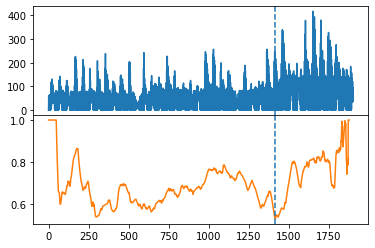

In [45]:
abp = dd
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
axs[0].plot(range(abp.shape[0]), abp)
axs[0].axvline(x=regime_locations[0], linestyle="dashed")
axs[1].plot(range(cac.shape[0]), cac, color='C1')
axs[1].axvline(x=regime_locations[0], linestyle="dashed")
plt.show()

In [30]:
print(np.std(dd))

68.16094557795051


(<Figure size 720x144 with 1 Axes>, [<Axes: >])

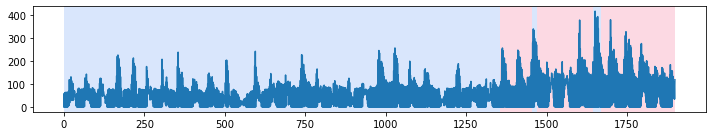

In [46]:
import matplotlib.pyplot as plt
import ruptures as rpt

# generate signal
#n_samples, dim, sigma = 1000, 3, 4
#n_bkps = 4  # number of breakpoints
#signal, bkps = rpt.pw_constant(n_samples, dim, n_bkps, noise_std=sigma)
#ay = np.array(ay)
#by = np.array(by)
# detection
yy = np.array(yy)
n=2800#540#50000#540#50000
dim=1
sigma=68.16#87.43#4.7#7.43
#sigma = 7.65
algo = rpt.Pelt(model="l2").fit(yy)
result = algo.predict(pen=np.log(n) * dim * sigma**2)

# display
rpt.display(yy, result)

In [47]:
import hfda


#N = np.power(2, 15)
#X = np.sin(np.linspace(0, 1000, N))
k_max = 5

D = hfda.measure(dd, k_max)
print(D)

2.1099955004151614


In [48]:
d = nolds.corr_dim(dd,20)
print(d)

1.3525359354051503


In [49]:
print(nolds.lyap_r(dd))

0.08604788529245494


C:\Users\subar\anaconda3\envs\d\lib\site-packages\nolds\measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 475
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


In [60]:
byy = data.head(240)

In [67]:
data.head(0)

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id


In [62]:
byy = byy.fillna(0)
byy = byy.drop(['datetime','prediction_unit_id','row_id','data_block_id'],axis=1)

In [69]:
gas_prices = pd.read_csv("D://KaggleData//enefit/gas_prices.csv")

In [70]:
client = pd.read_csv("D://KaggleData//enefit//client.csv")


##
## Running Tigramite BivCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 20


C:\Users\subar\anaconda3\envs\d\lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


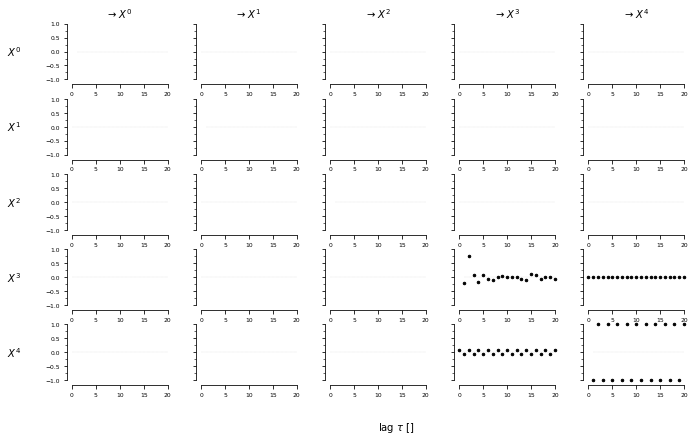


Starting preliminary phase  1

Starting test phase

p = 0
(0,-25) independent (0, 0) given () union set()
(0,-24) independent (0, 0) given () union set()
(0,-23) independent (0, 0) given () union set()
(0,-22) independent (0, 0) given () union set()
(0,-21) independent (0, 0) given () union set()
(0,-20) independent (0, 0) given () union set()
(0,-19) independent (0, 0) given () union set()
(0,-18) independent (0, 0) given () union set()
(0,-17) independent (0, 0) given () union set()
(0,-16) independent (0, 0) given () union set()
(0,-15) independent (0, 0) given () union set()
(0,-14) independent (0, 0) given () union set()
(0,-13) independent (0, 0) given () union set()
(0,-12) independent (0, 0) given () union set()
(0,-11) independent (0, 0) given () union set()
(0,-10) independent (0, 0) given () union set()
(0,-9) independent (0, 0) given () union set()
(0,-8) independent (0, 0) given () union set()
(0,-7) independent (0, 0) given () union set()
(0,-6) independent (0, 0) given 

In [63]:
N = byy.shape[1]
byy = np.array(byy)
var_names = [r'$X^{%d}$' % j for j in range(N)]
dat = pp.DataFrame(byy,var_names=var_names)
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(dataframe=dat, 
              cond_ind_test=parcorr,
              verbosity=1)
    
correlations = pcmci.run_bivci(tau_max=20, val_only=True)['val_matrix']
setup_args = {'var_names':var_names,
              'figsize':(10, 6),
              'x_base':5,
              'y_base':.5}
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, 
                                   setup_args=setup_args)
    
lpcmci = LPCMCI(dataframe=dat, 
                cond_ind_test=parcorr,
                verbosity=1)

# Define the analysis parameters.
tau_max = 25 #number of time steps into the past to consider
pc_alpha = 0.01 #i am guessing this is significance
    
# Run LPCMCI
results = lpcmci.run_lpcmci(tau_max=tau_max,
                                pc_alpha=pc_alpha)

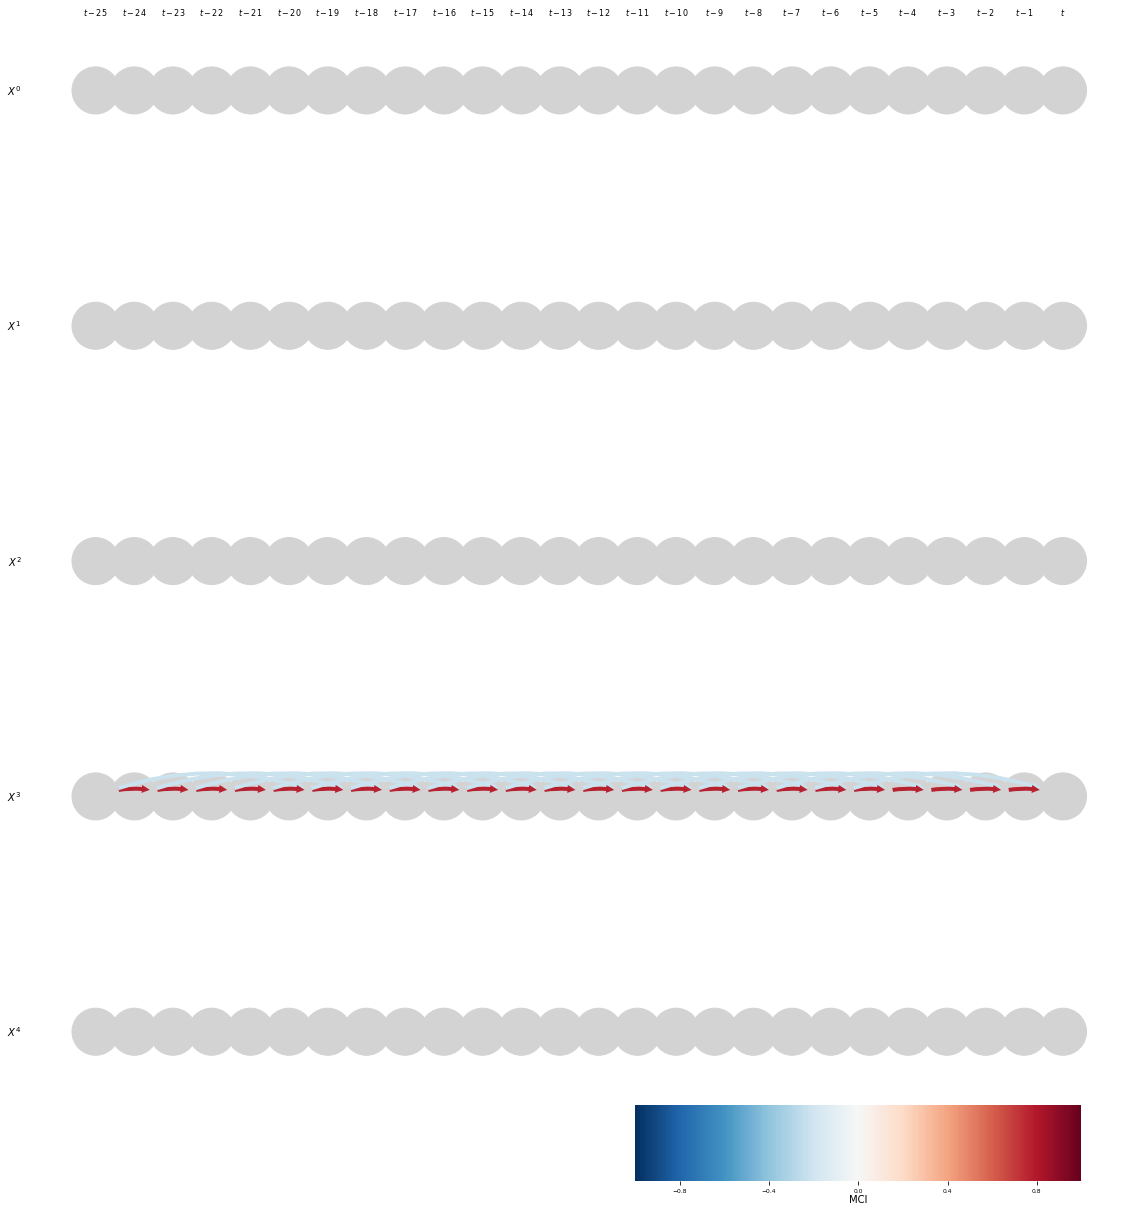

In [65]:
tp.plot_time_series_graph(
    figsize=(20, 20),
    node_size=0.05,
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='MCI',
    ); 